# Predicting Diamond Prices

### Project Overview

A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. In this project, you will use the results from a predictive model to make a recommendation on how much the jewelry company should bid for the diamonds.

### Project Details
A diamond distributor has recently decided to exit the market and has put up a set of 3,000 diamonds up for auction. Seeing this as a great opportunity to expand its inventory, a jewelry company has shown interest in making a bid. To decide how much to bid, you will use a large database of diamond prices to build a model to predict the price of a diamond based on its attributes. Then you will use the results of that model to make a recommendation for how much the company should bid.

### Step 1 – Understand the data: 
There are two datasets. diamonds.csv contains the data used to build the regression model. new_diamonds_new.csv contains the data for the diamonds the company would like to purchase. Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices. You'll be predicting prices for the new_diamonds.csv dataset.

**Carat** represents the weight of the diamond, and is a numerical variable.

**Cut** represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. In project zero, these categories were represented by an *ordinal variable, 1-5*. You can decide to use the ordinal or categorical variable.

**Clarity** represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (in order from least to most pure). In project zero, these categories were represented by an ordinal variable, 1-8. You can decide to use the ordinal or categorical variable.

**Color** represents the color of the diamond, and is rated D through J, with D being the most colorless (and valuable) and J being the most yellow.

### Step 2 – Build the model: 
In project zero, the results were provided, but now you get to calculate them. A few things are different this time around.

You have **more potential predictor variables**
You now know how to use categorical variables, so no need to rely only on ordinal variables.
Go through the steps you’ve learned through the course to build the model and come up with a regression equation.

### Step 3 – Calculate the predicted price for diamond:
For each diamond, plug in the values for each of the variables into the equation. Then solve the equation to get the estimated, or predicted, diamond price.

### Step 4 – Make a recommendation: 
Now that you have the predicted price for each diamond, it’s time to calculate the bid price for the whole set. Note: The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of the that price, so your recommended bid price should represent that.



In [161]:
# imports
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [162]:
# read data into a DataFrame
data = pd.read_csv('data/diamonds.csv', index_col=0) # index_col=0 help cut the first unreadable column
data.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
1,0.51,Premium,4,F,VS1,4,1749
2,2.25,Fair,1,G,I1,1,7069
3,0.70,Very Good,3,E,VS2,5,2757
4,0.47,Good,2,F,VS1,4,1243
5,0.30,Ideal,5,G,VVS1,7,789


In [163]:
# print the shape of the DataFrame
data.shape

(50000, 7)

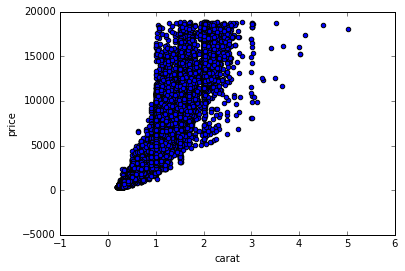

In [164]:
# visualize the relationship between the features and the response using scatterplots
# fig, axs = plt.subplots(1, 3, sharey=True)
# data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
# data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
# data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
data.plot(kind='scatter', x='carat', y='price')

## carat_ord and clarity_ord help avoid using dummy variables

In [165]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='price ~ carat + cut_ord + clarity_ord', data=data).fit()

# print the coefficients
lm.params

Intercept     -5255.223146
carat          8363.416658
cut_ord         160.378583
clarity_ord     457.801813
dtype: float64

In [166]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'carat': [3], 'cut_ord':[4], 'clarity_ord':[4]})
X_new.head()

,carat,clarity_ord,cut_ord
0,3,4,4


In [167]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 22307.74840955])

In [168]:
data.info()
print int(4)
# average price for all diamonds with carat == 3 is much cheaper, why??
data[(data.carat == 3) & (data.cut_ord == 1) & (data.clarity_ord == 2)].price.median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 7 columns):
carat          50000 non-null float64
cut            50000 non-null object
cut_ord        50000 non-null int64
color          50000 non-null object
clarity        50000 non-null object
clarity_ord    50000 non-null int64
price          50000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB
4


16970.0

In [169]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,-5314.650288,-5195.796005
carat,8336.829246,8390.004070
cut_ord,149.573779,171.183387
clarity_ord,450.156544,465.447082


In [170]:
# print the p-values for the model coefficients
lm.pvalues

Intercept       0.000000e+00
carat           0.000000e+00
cut_ord        1.534864e-184
clarity_ord     0.000000e+00
dtype: float64

In [171]:
# print the R-squared value for the model
lm.rsquared

0.88620044737701109

In [172]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.298e+05
Date:                Sun, 06 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:49:58   Log-Likelihood:            -4.3126e+05
No. Observations:               50000   AIC:                         8.625e+05
Df Residuals:                   49996   BIC:                         8.626e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -5255.2231     30.320   -173.326      0.000     -5314.650 -5195.796
carat        8363.4167     13.565    616.547      0.000      8336.829  8390.004
cut_ord       160.3786      5.513     29.093      0.000       149.574   171.183
clarity_ord   457.8018      3.901    117.366      0.000       450.157   465.447
==============================================================================
Omnibus:                    11093.961   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169582.750
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                      11.928   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Without using dummy variable, we can't include color variable for analysis; but sklearn can deploy dummy variable

# Linear regression in sklearn

In [173]:
# create X and y
feature_cols = ['carat', 'cut_ord', 'clarity_ord']
X = data[feature_cols]
y = data.price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-5255.22314648
[ 8363.41665765   160.37858283   457.80181294]


In [174]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('carat', 8363.4166576539392),
 ('cut_ord', 160.37858283100249),
 ('clarity_ord', 457.80181293551772)]

In [175]:
# predict for a new observation

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'carat': [3], 'cut_ord':[1], 'clarity_ord':[1]})
X_new.head()
lm.predict(X_new)

array([ 20453.20722225])

In [176]:
# calculate the R-squared
lm.score(X, y)

0.88620044737701109

## Multiple Variables or Features

In [177]:
# create X and y
feature_cols = ['carat', 'cut_ord', 'clarity_ord']
X = data[feature_cols]
y = data.price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-5255.22314648
[ 8363.41665765   160.37858283   457.80181294]


In [178]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('carat', 8363.4166576539392),
 ('cut_ord', 160.37858283100249),
 ('clarity_ord', 457.80181293551772)]

In [179]:
# predict for a new observation

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'carat': [3], 'cut_ord':[4], 'clarity_ord':[4]})
print X_new.head()
lm.predict(X_new)

   carat  clarity_ord  cut_ord
0      3            4        4


array([ 22307.74840955])

# Multiple Categorical Feature

In [180]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.color, prefix='color').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price,color_E,color_F,color_G,color_H,color_I,color_J
1,0.51,Premium,4,F,VS1,4,1749,0.0,1.0,0.0,0.0,0.0,0.0
2,2.25,Fair,1,G,I1,1,7069,0.0,0.0,1.0,0.0,0.0,0.0
3,0.70,Very Good,3,E,VS2,5,2757,1.0,0.0,0.0,0.0,0.0,0.0
4,0.47,Good,2,F,VS1,4,1243,0.0,1.0,0.0,0.0,0.0,0.0
5,0.30,Ideal,5,G,VVS1,7,789,0.0,0.0,1.0,0.0,0.0,0.0


In [181]:
# create X and y
feature_cols = ['carat', 'cut_ord', 'clarity_ord', 'color_E', 'color_F',
                'color_G', 'color_H', 'color_I', 'color_J']
X = data[feature_cols]
y = data.price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('carat', 8749.6839395381885),
 ('cut_ord', 158.65756296329647),
 ('clarity_ord', 484.54502493626916),
 ('color_E', -203.35083980692116),
 ('color_F', -306.98616239567076),
 ('color_G', -476.31541043582234),
 ('color_H', -957.19641805524645),
 ('color_I', -1377.7104907290231),
 ('color_J', -2222.3878246959075)]

In [182]:
# print intercept and coefficients
print lm.score(X,y)

0.903744028557


In [183]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='price ~ carat + cut_ord + clarity_ord + color_E + color_F + color_G + color_H + color_I + color_J', data=data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.215e+04
Date:                Sun, 06 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:49:59   Log-Likelihood:            -4.2708e+05
No. Observations:               50000   AIC:                         8.542e+05
Df Residuals:                   49990   BIC:                         8.543e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -5073.5458     30.572   -165.952      0.000     -5133.468 -5013.624
carat        8749.6839     13.158    664.959      0.000      8723.894  8775.474
cut_ord       158.6576      5.073     31.275      0.000       148.714   168.601
clarity_ord   484.5450      3.631    133.453      0.000       477.429   491.661
color_E      -203.3508     20.393     -9.972      0.000      -243.321  -163.380
color_F      -306.9862     20.570    -14.924      0.000      -347.304  -266.668
color_G      -476.3154     20.058    -23.746      0.000      -515.630  -437.001
color_H      -957.1964     21.395    -44.739      0.000      -999.131  -915.262
color_I     -1377.7105     23.968    -57.481      0.000     -1424.688 -1330.733
color_J     -2222.3878     29.658    -74.935      0.000     -2280.517 -2164.258
==============================================================================
Omnibus:                    10541.356   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233765.588
Skew:                           0.458   Prob(JB):                         0.00
Kurtosis:                      13.553   Cond. No.                         49.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Make a Prediction

In [184]:
diamonds_new = pd.read_csv('data/new-diamonds.csv', index_col=0)
diamonds_new.head()

,carat,cut,cut_ord,color,clarity,clarity_ord
1,1.22,Premium,4,G,SI1,3
2,1.01,Good,2,G,VS2,5
3,0.71,Very Good,3,I,VS2,5
4,1.01,Ideal,5,D,SI2,2
5,0.27,Ideal,5,H,VVS2,6


In [185]:
new_dummies = pd.get_dummies(diamonds_new.color, prefix='color').iloc[:, 1:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
new_data = pd.concat([diamonds_new, new_dummies], axis=1)
new_data.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,color_E,color_F,color_G,color_H,color_I,color_J
1,1.22,Premium,4,G,SI1,3,0.0,0.0,1.0,0.0,0.0,0.0
2,1.01,Good,2,G,VS2,5,0.0,0.0,1.0,0.0,0.0,0.0
3,0.71,Very Good,3,I,VS2,5,0.0,0.0,0.0,0.0,1.0,0.0
4,1.01,Ideal,5,D,SI2,2,0.0,0.0,0.0,0.0,0.0,0.0
5,0.27,Ideal,5,H,VVS2,6,0.0,0.0,0.0,1.0,0.0,0.0


In [186]:
feature_cols = ['carat', 'cut_ord', 'clarity_ord', 'color_E', 'color_F',
                'color_G', 'color_H', 'color_I', 'color_J']
X = new_data[feature_cols]
X.head()

,carat,cut_ord,clarity_ord,color_E,color_F,color_G,color_H,color_I,color_J
1,1.22,4,3,0.0,0.0,1.0,0.0,0.0,0.0
2,1.01,2,5,0.0,0.0,1.0,0.0,0.0,0.0
3,0.71,3,5,0.0,0.0,0.0,0.0,1.0,0.0
4,1.01,5,2,0.0,0.0,0.0,0.0,0.0,0.0
5,0.27,5,6,0.0,0.0,0.0,1.0,0.0,0.0


In [187]:
# make sure index start from 1 not 0
pd.Series(range(len(new_data)))+1

0          1
1          2
2          3
3          4
4          5
        ... 
2995    2996
2996    2997
2997    2998
2998    2999
2999    3000
dtype: int64

In [188]:
predictions = lm.predict(X)
new_price = pd.Series(predictions, name='new_price', index=pd.Series(range(len(predictions)))+1)
new_data_full = pd.concat([new_data, new_price], axis=1)
new_data_full.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,color_E,color_F,color_G,color_H,color_I,color_J,new_price
1,1.22,Premium,4,G,SI1,3,0.0,0.0,1.0,0.0,0.0,0.0,7213.018564
2,1.01,Good,2,G,VS2,5,0.0,0.0,1.0,0.0,0.0,0.0,6027.359861
3,0.71,Very Good,3,I,VS2,5,0.0,0.0,0.0,0.0,1.0,0.0,2659.717162
4,1.01,Ideal,5,D,SI2,2,0.0,0.0,0.0,0.0,0.0,0.0,5526.012885
5,0.27,Ideal,5,H,VVS2,6,0.0,0.0,0.0,1.0,0.0,0.0,32.230452


## Plot the new dataset

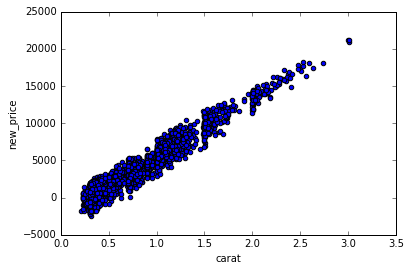

In [189]:
new_data_full.plot(kind='scatter', x='carat', y='new_price')

# The Business Problem
You recently started working for a company that manufactures and sells high-end home goods. **Last year the company sent out its first print catalog**, and is preparing to send out this year's catalog in the coming months. The company has **250 new customers** from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. **Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds 10,000 dollars.**

### Details

The costs of printing and distributing is **6.50 dollars per catalog.
The average gross margin (price - cost) on all products sold through the catalog is 50%.
Make sure to multiply your revenue by the gross margin first before you subtract out the 6.50 cost when calculating your profit.**

Write a short report with your recommendations outlining your reasons why the company should go with your recommendations to your manager.

### Steps to Success

#### Step 1: Business and Data Understanding
Your project should include:

A description of the key business decisions that need to be made.
Note: Clean data is provided for this project, so you can skip the data preparation step of the Problem Solving Framework.

#### Step 2: Analysis, Modeling, and Validation
Build a linear regression model, then use it to predict sales for the 250 customers. We encourage you to use Alteryx to build the best linear model with your data.

Note: For students using software other than Alteryx, if you decide to use Customer Segment as one of your predictor variables, please set the base case to Credit Card Only.

However, feel free to use any tool you’d like. You should create your linear regression model and come up with a linear regression equation.

Once you have your linear regression equation, you should use your linear regression equation to predict sales for the individual people in your mailing list.

#### Step 3: Writeup
Once you have your predicted or expected profit, write a brief report with your recommendation to whether the company should send the catalog or not.

Hint: We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. For example, if a customer were to buy from us, we predict this customer will buy 450 dollars worth of products. At a 30 pct chance that this person will actually buy from us, we can expect revenue to be 450 x 30 pct = 135.

### Review
Use the project rubric to review your project. If you are happy with your submission, then you're ready to submit your project. If you see room for improvement, keep working to improve your project.

### Submission Template
Use the submission template at the bottom of this section to submit your project. After filling it out, save it as a PDF and submit the PDF in the next section.

### Data
#### p1-customers.xlsx -
This dataset includes the following information on about 2,300 customers. Important: You should build your model on this dataset and not p1-mailinglist.xlsx.

#### p1-mailinglist.xlsx - 
This dataset is the 250 customers that you need to predict sales. This is the list of customers that the company would send a catalog to. Use this dataset to estimate how much revenue the company can expect if they send out the catalog. It has the same fields as P1_Customers.xlsx, but includes two additional variables.

**Score_No**: The probability that the customer WILL NOT respond to the catalog and not make a purchase.
**Score_Yes**: The probability that the customer WILL respond to the catalog and make a purchase.

Hint: We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. 

For example, if a customer were to buy from us, we predict this customer will buy 450 dollars worth of products. At a 30pct chance that this person will actually buy from us, we can expect revenue to be 450 dollar x 30 pct = 135 dollar



# Project 1: Predicting Catalog Demand
Complete each section. When you are ready, save your file as a PDF document and submit it here:  https://classroom.udacity.com/nanodegrees/nd008/parts/c0b53068-1239-4f01-82bf-24886872f48e/project
 
## Step 1: Business and Data Understanding
Provide an explanation of the key decisions that need to be made. (500 word limit)

### Key Decisions:
Answer these questions

#### What decisions needs to be made?

![Profit Formula](image/formula.png)

If total profit is greater than 10000 dollars, catalogs can be sent to 250 new customers, if not, don't send. 


#### What data is needed to inform those decisions?

## Step 2: Analysis, Modeling, and Validation
Provide a description of how you set up your linear regression model, what variables you used and why, and the results of the model. Visualizations are encouraged. (500 word limit)

Important: Use the p1-customers.xlsx to train your linear model. 
 
At the minimum, answer these questions:

How and why did you select the predictor variables (see supplementary text) in your model? You must explain how your continuous predictor variables you’ve chosen have a linear relationship with the target variable. Please refer to this lesson to help you explore your data and use scatterplots to search for linear relationships. You must include scatterplots in your answer.

Explain why you believe your linear model is a good model. You must justify your reasoning using the statistical results that your regression model created. For each variable you selected, please justify how each variable is a good fit for your model by using the p-values and R-squared values that your model produced.

What is the best linear regression equation based on the available data? Each coefficient should have no more than 2 digits after the decimal (ex: 1.28)

Important: The regression equation should be in the form:

Y = Intercept + b1 * Variable_1 + b2 * Variable_2 + b3 * Variable_3……

For example: Y = 482.24 + 28.83 * Loan_Status – 159 * Income + 49 (If Type: Credit Card) – 90 (If Type: Mortgage) + 0 (If Type: Cash)

Note that we must include the 0 coefficient for the type Cash.

Note: For students using software other than Alteryx, if you decide to use Customer Segment as one of your predictor variables, please set the base case to Credit Card Only.
 
Step 3: Presentation/Visualization
Use your model results to provide a recommendation. (500 word limit)

At the minimum, answer these questions:

What is your recommendation? Should the company send the catalog to these 250 customers?

How did you come up with your recommendation? (Please explain your process so reviewers can give you feedback on your process)

What is the expected profit from the new catalog (assuming the catalog is sent to these 250 customers)?


Before you Submit

Please check your answers against the requirements of the project dictated by the rubric here. Reviewers will use this rubric to grade your project.


In [190]:
customers = pd.read_excel('data/p1-customers.xlsx')

In [191]:
customers.tail()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Avg Sale Amount,Store Number,Responded to Last Catalog,Avg Num Products Purchased,# Years as Customer
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7
2374,Elissa Engledow,Credit Card Only,3315,9360 E Center Ave,Denver,CO,80247,167.59,104,No,1,3


In [192]:
mailinglist = pd.read_csv('data/p1-mailinglist.csv')

In [193]:
mailinglist.head()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Store Number,Avg Num Products Purchased,# Years as Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [194]:
# customers: has Avg Sale Amount, which mailinglist doesn't have 
# mailinglist: has Score_No and Score_Yes, which Customers doesn't have 
# we need to build a model upon customers
print customers.columns
print mailinglist.columns
print customers.shape
print mailinglist.shape

Index([u'Name', u'Customer Segment', u'Customer ID', u'Address', u'City',
       u'State', u'ZIP', u'Avg Sale Amount', u'Store Number',
       u'Responded to Last Catalog', u'Avg Num Products Purchased',
       u'# Years as Customer'],
      dtype='object')
Index([u'Name', u'Customer Segment', u'Customer ID', u'Address', u'City',
       u'State', u'ZIP', u'Store Number', u'Avg Num Products Purchased',
       u'# Years as Customer', u'Score_No', u'Score_Yes'],
      dtype='object')
(2375, 12)
(250, 12)


## Select Features

### Customer Segment
There are 4 different segments, last year all customers from 4 segments had been sent catalogs; this year, another 225 new customers are to be considered sending.
Maybe different segment has different rate of buying items given catalog.

Customer Segment is a categorical feature, we need to use dummy variable here. 

In [195]:
# Customer Segment
customers['Customer Segment'].unique()

array([u'Store Mailing List', u'Loyalty Club and Credit Card',
       u'Loyalty Club Only', u'Credit Card Only'], dtype=object)

In [196]:
mailinglist['Customer Segment'].unique()

array(['Loyalty Club Only', 'Loyalty Club and Credit Card',
       'Credit Card Only', 'Store Mailing List'], dtype=object)

In [197]:
print customers.groupby('Customer Segment')['Customer Segment'].count()
print mailinglist.groupby('Customer Segment')['Customer Segment'].count()

Customer Segment
Credit Card Only                 494
Loyalty Club Only                579
Loyalty Club and Credit Card     194
Store Mailing List              1108
Name: Customer Segment, dtype: int64
Customer Segment
Credit Card Only                 82
Loyalty Club Only               122
Loyalty Club and Credit Card     26
Store Mailing List               20
Name: Customer Segment, dtype: int64


In [198]:
customers[(customers['Customer Segment'] != 'Store Mailing List') & (customers['Responded to Last Catalog']=='Yes')]

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Avg Sale Amount,Store Number,Responded to Last Catalog,Avg Num Products Purchased,# Years as Customer
1284,Diana Pederson,Loyalty Club and Credit Card,2905,6881 E 77th Pl,Commerce City,CO,80022,137.08,107,Yes,1,1
1359,Tiffany Zalikowski,Loyalty Club Only,321,9633 E 5th Ave,Denver,CO,80230,143.99,105,Yes,1,1
1526,Janet Whitaker,Loyalty Club Only,1276,2726 S Hooker St,Denver,CO,80236,98.67,101,Yes,1,6
1596,Yvette West,Loyalty Club Only,1663,2601 Newport St,Denver,CO,80207,232.16,100,Yes,3,4
1685,Sherry Earls,Loyalty Club Only,2137,2405 Bell Ct,Lakewood,CO,80215,215.48,106,Yes,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Cheryl Lorenz,Credit Card Only,1079,826 S Eliot St,Denver,CO,80219,242.72,106,Yes,2,8
2039,Holly Boggs,Credit Card Only,1239,7166 W Custer Ave,Lakewood,CO,80226,221.58,106,Yes,2,3
2093,Elizabeth Meck,Credit Card Only,1584,1010 S Kalispell St,Aurora,CO,80017,105.91,105,Yes,1,8
2264,Kimberly Biagiotti,Credit Card Only,2667,6828 S Elizabeth St,Centennial,CO,80122,131.05,100,Yes,2,8


In [199]:
customers[ (customers['Responded to Last Catalog']=='Yes')].shape

(171, 12)

####  Let's make dummy variables for Customer Segment

In [200]:
# create three dummy variables using get_dummies, then exclude the first dummy column
CS_dummies = pd.get_dummies(customers['Customer Segment'], prefix='CS').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
train1 = pd.concat([customers, CS_dummies], axis=1)
train1.head()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Avg Sale Amount,Store Number,Responded to Last Catalog,Avg Num Products Purchased,# Years as Customer,CS_Loyalty Club Only,CS_Loyalty Club and Credit Card,CS_Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0.0,0.0,1.0
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0.0,0.0,1.0
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0.0,0.0,1.0
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0.0,0.0,1.0
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0.0,0.0,1.0


In [201]:
# create three dummy variables using get_dummies, then exclude the first dummy column
CS_dummies_test = pd.get_dummies(mailinglist['Customer Segment'], prefix='CS').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
test1 = pd.concat([mailinglist, CS_dummies_test], axis=1)
test1.tail()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Store Number,Avg Num Products Purchased,# Years as Customer,Score_No,Score_Yes,CS_Loyalty Club Only,CS_Loyalty Club and Credit Card,CS_Store Mailing List
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194,0.0,0.0,0.0
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800,1.0,0.0,0.0
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456,1.0,0.0,0.0
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251,0.0,0.0,0.0
249,Yvette Kent,Credit Card Only,762,1071 Worchester St,Aurora,CO,80011,100,5,0.5,0.796350,0.203650,0.0,0.0,0.0


### Customer ID, Address, Zip Code
These two are less likely to be influential in making a purchase after receiving a catalog

Customer ID is unique to each person, which is useless in prediction. 
Address and Zip Code are also quite specific or not general enough.

Location of a customer could have effect on purchase, but I will consider location in City and States which are more general for potential predicition

### City and State as a feature 
Maybe people from the same city or town are more likely to act in a similar way when receiving a catalog

Make sure new customers come from the same cities as last year's customers

cityState is a new column combining City and State, and dummy variable is needed for it

Later I found out all cities are from the same state. 

In [202]:
# merge City and State into one single column, 
# make sure same city name in two different states considered to be two cities
customers['cityState'] = customers.City + customers.State
print customers.groupby('cityState').cityState.count()
print customers.groupby('cityState').cityState.count().shape
print customers.columns

cityState
ArvadaCO         247
AuroraCO         493
BoulderCO          3
BrightonCO         2
BroomfieldCO     125
                ... 
ParkerCO          27
SuperiorCO         9
ThorntonCO        35
WestminsterCO     85
Wheat RidgeCO     54
Name: cityState, dtype: int64
(27,)
Index([                      u'Name',           u'Customer Segment',
                      u'Customer ID',                    u'Address',
                             u'City',                      u'State',
                              u'ZIP',            u'Avg Sale Amount',
                     u'Store Number',  u'Responded to Last Catalog',
       u'Avg Num Products Purchased',        u'# Years as Customer',
                        u'cityState'],
      dtype='object')


In [203]:
mailinglist['cityState'] = mailinglist.City + mailinglist.State
print mailinglist.groupby('cityState').cityState.count()
print mailinglist.groupby('cityState').cityState.count().shape
print mailinglist.groupby('City').City.count().shape
print mailinglist.groupby('State').State.count().shape
print customers.groupby('State').State.count().shape
# all cities are from the same state

cityState
ArvadaCO          25
AuroraCO          59
BroomfieldCO      13
Castle PinesCO     1
CentennialCO       9
                  ..
NorthglennCO       3
ParkerCO           4
ThorntonCO         3
WestminsterCO      6
Wheat RidgeCO      5
Name: cityState, dtype: int64
(20,)
(20,)
(1,)
(1,)


In [204]:
# Yes, new 225 mailinglist customers are from the same cities of last year's customers 
pd.Series(mailinglist.cityState.unique()).isin(pd.Series(customers.cityState.unique()))

0     True
1     True
2     True
3     True
4     True
      ... 
15    True
16    True
17    True
18    True
19    True
dtype: bool

#### Create dummy variable for City

In [205]:
# create three dummy variables using get_dummies, then exclude the first dummy column
City_dummies = pd.get_dummies(customers['City'], prefix='City').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
train2 = pd.concat([train1, City_dummies], axis=1)
train2.head()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Avg Sale Amount,Store Number,Responded to Last Catalog,...,City_Littleton,City_Lone Tree,City_Louisville,City_Morrison,City_Northglenn,City_Parker,City_Superior,City_Thornton,City_Westminster,City_Wheat Ridge
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
# create three dummy variables using get_dummies, then exclude the first dummy column
City_dummies_test = pd.get_dummies(mailinglist['City'], prefix='City').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
test2 = pd.concat([test1, City_dummies_test], axis=1)
test2.tail()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Store Number,Avg Num Products Purchased,# Years as Customer,...,City_Greenwood Village,City_Highlands Ranch,City_Lakewood,City_Littleton,City_Louisville,City_Northglenn,City_Parker,City_Thornton,City_Westminster,City_Wheat Ridge
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,Yvette Kent,Credit Card Only,762,1071 Worchester St,Aurora,CO,80011,100,5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Store Number
Maybe different store somehow influence its customers to shop more or less using catalog

There are 10 stores, all customers are from nearby cities

There are no ordinal relationship between these 10 stores, so dummy variables are needed

In [207]:
customers.groupby('Store Number')['Store Number'].count()

Store Number
100    326
101    276
102     85
103    225
104    270
105    305
106    283
107    226
108    210
109    169
Name: Store Number, dtype: int64

In [208]:
mailinglist.groupby('Store Number')['Store Number'].count()

Store Number
100    23
101    29
102    12
103    23
104    32
105    42
106    28
107    31
108    16
109    14
Name: Store Number, dtype: int64

In [209]:
# create three dummy variables using get_dummies, then exclude the first dummy column
SN_dummies = pd.get_dummies(customers['Store Number'], prefix='SN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
train3 = pd.concat([train2, SN_dummies], axis=1)
train3.head()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Avg Sale Amount,Store Number,Responded to Last Catalog,...,City_Wheat Ridge,SN_101,SN_102,SN_103,SN_104,SN_105,SN_106,SN_107,SN_108,SN_109
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
# create three dummy variables using get_dummies, then exclude the first dummy column
SN_dummies_test = pd.get_dummies(mailinglist['Store Number'], prefix='SN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
test3 = pd.concat([test2, SN_dummies_test], axis=1)
test3.tail()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Store Number,Avg Num Products Purchased,# Years as Customer,...,City_Wheat Ridge,SN_101,SN_102,SN_103,SN_104,SN_105,SN_106,SN_107,SN_108,SN_109
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,Yvette Kent,Credit Card Only,762,1071 Worchester St,Aurora,CO,80011,100,5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Avg Num Products Purchased and  # Years as Customer
Maybe average number of products bought by a customer may influence this customer to buy after receiving a catalog

Maybe the number of years as customer increase the likelihood of a customer buy after receiving a catalog

Both columns are discrete variables, no dummy variables are needed there

## Let's check the validity of models

In [226]:
train3.columns

Index([                           u'Name',                u'Customer_Segment',
                           u'Customer_ID',                         u'Address',
                                  u'City',                           u'State',
                                   u'ZIP',                 u'Avg_Sale_Amount',
                          u'Store_Number',       u'Responded_to_Last_Catalog',
            u'Avg_Num_Products_Purchased',             u'#_Years_as_Customer',
                  u'CS_Loyalty_Club_Only', u'CS_Loyalty_Club_and_Credit_Card',
                 u'CS_Store_Mailing_List',                     u'City_Aurora',
                          u'City_Boulder',                   u'City_Brighton',
                       u'City_Broomfield',               u'City_Castle_Pines',
                       u'City_Centennial',              u'City_Commerce_City',
                           u'City_Denver',                  u'City_Edgewater',
                        u'City_Englewood',          

In [256]:
train3.columns = train3.columns.str.replace(' ', '_')
train3['Years_as_Customer'] = train3['#_Years_as_Customer']

test3.columns = test3.columns.str.replace(' ', '_')
test3['Years_as_Customer'] = test3['#_Years_as_Customer']

In [266]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Avg_Sale_Amount ~ Store_Number + Avg_Num_Products_Purchased + Years_as_Customer + CS_Loyalty_Club_Only + CS_Loyalty_Club_and_Credit_Card + CS_Store_Mailing_List + City_Aurora + City_Boulder + City_Brighton + City_Broomfield + City_Castle_Pines + City_Centennial + City_Commerce_City + City_Denver + City_Edgewater + City_Englewood + City_Golden + City_Greenwood_Village + City_Henderson + City_Highlands_Ranch + City_Lafayette + City_Lakewood + City_Littleton + City_Lone_Tree + City_Louisville + City_Morrison + City_Northglenn + City_Parker + City_Superior + City_Thornton + City_Westminster + City_Wheat_Ridge + SN_101 + SN_102 + SN_103 + SN_104 + SN_105 + SN_106 + SN_107 + SN_108 + SN_109', data=train3).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     304.5
Date:                Sun, 06 Nov 2016   Prob (F-statistic):               0.00
Time:                        17:11:40   Log-Likelihood:                -15044.
No. Observations:                2375   AIC:                         3.017e+04
Df Residuals:                    2334   BIC:                         3.041e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          11.4761      4.628      2.480      0.013         2.400    20.552
Store_Number                        3.1276      0.162     19.321      0.000         2.810     3.445
Avg_Num_Products_Purchased         67.1014      1.529     43.877      0.000        64.102    70.100
Years_as_Customer                  -2.5182      1.238     -2.035      0.042        -4.945    -0.091
CS_Loyalty_Club_Only             -149.2751      9.041    -16.511      0.000      -167.005  -131.545
CS_Loyalty_Club_and_Credit_Card   283.4565     11.987     23.648      0.000       259.951   306.962
CS_Store_Mailing_List            -244.8122      9.863    -24.821      0.000      -264.154  -225.471
City_Aurora                       -14.1726     16.739     -0.847      0.397       -46.998    18.653
City_Boulder                      -66.3976     81.163     -0.818      0.413      -225.556    92.761
City_Brighton                     -85.4477     98.040     -0.872      0.384      -277.701   106.806
City_Broomfield                   -18.9274     16.784     -1.128      0.260       -51.841    13.986
City_Castle_Pines                 -98.1313    100.084     -0.980      0.327      -294.394    98.131
City_Centennial                    -3.8074     21.963     -0.173      0.862       -46.877    39.262
City_Commerce_City                -32.4447     45.242     -0.717      0.473      -121.163    56.274
City_Denver                         5.3806     12.877      0.418      0.676       -19.871    30.632
City_Edgewater                     38.3039     41.545      0.922      0.357       -43.166   119.774
City_Englewood                     11.5932     22.721      0.510      0.610       -32.962    56.148
City_Golden                        -6.5886     33.026     -0.199      0.842       -71.351    58.174
City_Greenwood_Village            -44.8543     39.641     -1.132      0.258      -122.589    32.881
City_Henderson                   -273.7620    138.501     -1.977      0.048      -545.360    -2.163
City_Highlands_Ranch              -22.0864     32.120     -0.688      0.492       -85.072    40.899
City_Lafayette                    -55.6922     62.604     -0.890      0.374      -178.458    67.074
City_Lakewood                       1.2513     15.052      0.083      0.934       -28.266    30.769
City_Littleton                    -22.0774     21.489     -1.027      0.304       -64.217    20.062
City_Lone_Tree                     86.2512    138.837      0.621      0.535      -186.006   358.508
City_Louisville                   -48.6279     70.082     -0.694      0.488      -186.057    88.801
City_Morrison                      -8.5057     53.802     -0.158      0.874      -114.011    97.000
City_Northglenn                   -25.0745     30.059     -0.834      0.404       -

In [246]:
print len(lm.pvalues)
print len(lm.pvalues[lm.pvalues < 0.05])
print type(lm.pvalues)
print lm.pvalues.index[0]
lm.pvalues[lm.pvalues < 0.05]

42
12
<class 'pandas.core.series.Series'>
Intercept


Intercept                      1.322164e-02
Store_Number                   2.827707e-77
Avg_Num_Products_Purchased    3.482815e-307
Years_as_Customer              4.198495e-02
CS_Loyalty_Club_Only           5.269926e-58
                                  ...      
City_Henderson                 4.820426e-02
SN_105                         2.544803e-02
SN_106                         3.383495e-03
SN_107                         3.606195e-03
SN_108                         2.394503e-02
dtype: float64

## Get Features Dataframe and Target Dataframe ready

In [252]:
# only 11 out of 51 columns are selected finally as features for prediction
print len(train3.columns)
len(lm.pvalues[lm.pvalues < 0.05][1:])

51


11

In [263]:
features = train3[lm.pvalues[lm.pvalues < 0.05][1:].index]
sales = train3['Avg_Sale_Amount']

### Without having the same feature columns, lm.predict(features_test) won't work
dataframe features_test must have the same number of columns with dataframe features


#### See which column of test3 doesn't have which is contained in features

In [261]:
print features.columns[-pd.Series(features.columns).isin(pd.Series(test3.columns))]

# add this missing column 'City_Henderson' to test3
test3['City_Henderson'] = 0.0

Index([u'City_Henderson'], dtype='object')


In [262]:
# now test3 or features_test have the same amount of features columns as training dataset
features_test = test3[lm.pvalues[lm.pvalues < 0.05][1:].index]

In [264]:
## Using sklearn to build a linear regression model

features.info()
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 11 columns):
Store_Number                       2375 non-null int64
Avg_Num_Products_Purchased         2375 non-null int64
Years_as_Customer                  2375 non-null int64
CS_Loyalty_Club_Only               2375 non-null float64
CS_Loyalty_Club_and_Credit_Card    2375 non-null float64
CS_Store_Mailing_List              2375 non-null float64
City_Henderson                     2375 non-null float64
SN_105                             2375 non-null float64
SN_106                             2375 non-null float64
SN_107                             2375 non-null float64
SN_108                             2375 non-null float64
dtypes: float64(8), int64(3)
memory usage: 204.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
Store_Number                       250 non-null int64
Avg_Num_Products_Purchased         250 non-null int64
Years_a

In [268]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(features, sales)

# print intercept and coefficients
print lm.intercept_
print lm.coef_
print lm.score(features, sales)

363.887206295
[  -0.43198545   66.83583681   -2.29703979 -150.44905137  282.97631055
 -246.97723803 -280.85316645  -13.0735529    -9.76158408   -4.55278903
   -3.00737269]
0.837674854108


In [271]:
# Let's make predictions 

sales_pred = lm.predict(features_test)

new_customers = pd.concat([mailinglist, pd.Series(sales_pred, name='Avg_Sale_Pred')], axis = 1)

new_customers.head()

,Name,Customer Segment,Customer ID,Address,City,State,ZIP,Store Number,Avg Num Products Purchased,# Years as Customer,Score_No,Score_Yes,cityState,Avg_Sale_Pred
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,CentennialCO,355.054232
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,DenverCO,1002.869784
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,EnglewoodCO,635.591147
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,DenverCO,301.237104
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,CentennialCO,434.706496


# Make a decision

In [272]:
# calc the profit 
new_customers['profit'] = new_customers.Avg_Sale_Pred*0.5*new_customers['Avg Num Products Purchased']*new_customers.Score_Yes - 6.5

In [273]:
new_customers.profit.sum()

137174.90735509968

In [274]:
# calc the profit 
new_customers['profit1'] = new_customers.Avg_Sale_Pred*0.5*new_customers.Score_Yes - 6.5

In [276]:
new_customers.profit1.sum() > 10000

True